In [57]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [58]:
username = 'bbinu'
token = '7200201b0ec2e533'

# Set the datastream and start/enddates
datastream = 'kcgmetM1.b1'
startdate = '2024-09-16'
enddate = '2024-09-16'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate, enddate)

[DOWNLOADING] kcgmetM1.b1.20240916.000000.cdf

If you use these data to prepare a publication, please cite:

Kyrouac, J., Shi, Y., & Tuftedal, M. Surface Meteorological Instrumentation
(MET), 2024-09-16 to 2024-09-16, ARM Mobile Facility (KCG), kennaook ⁄ Cape
Grim, Tasmania, Australia; AMF2 (main site for CAPE-k) (M1). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1786358



In [59]:
ds_met = act.io.read_arm_netcdf(result)

In [60]:
ds_met

<xarray.Dataset> Size: 340kB
Dimensions:                       (time: 1440, bound: 2)
Coordinates:
  * time                          (time) datetime64[ns] 12kB 2024-09-16 ... 2...
Dimensions without coordinates: bound
Data variables: (12/51)
    base_time                     datetime64[ns] 8B 2024-09-16
    time_offset                   (time) datetime64[ns] 12kB 2024-09-16 ... 2...
    time_bounds                   (time, bound) object 23kB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    atmos_pressure                (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean                     (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    logger_temp                   (time) float32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_logger_temp                (time) int32 6kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                           float32 4B ...
    lon                           float32 4B ...
    alt                           float32 4B ...
Attributes: (12/26)
    command_line:                met_ingest -s kcg -f M1
    Conventions:                 ARM-1.3
    process_version:             ingest-met-4.56-0.el7
    dod_version:                 met-b1-7.6
    input_source:                /data/collection/kcg/kcgmetM1.00/MET_Table1....
    site_id:                     kcg
    ...                          ...
    tbrg_precip_corr_info:       0.000000 * tbrg_precip_total^2 + 1.006000 * ...
    history:                     created by user dsmgr on machine prod-proc4....
    _file_dates:                 ['20240916']
    _file_times:                 ['000000']
    _datastream:                 kcgmetM1.b1
    _arm_standards_flag:         1

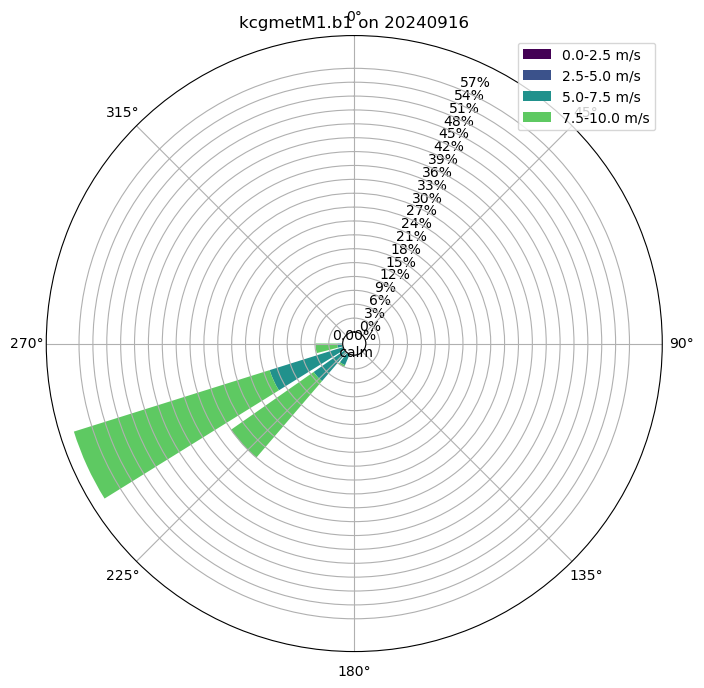

In [61]:
windrose = act.plotting.WindRoseDisplay(ds_met, figsize=(10,8))
windrose.plot('wdir_vec_mean', 'wspd_vec_mean', spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.show()

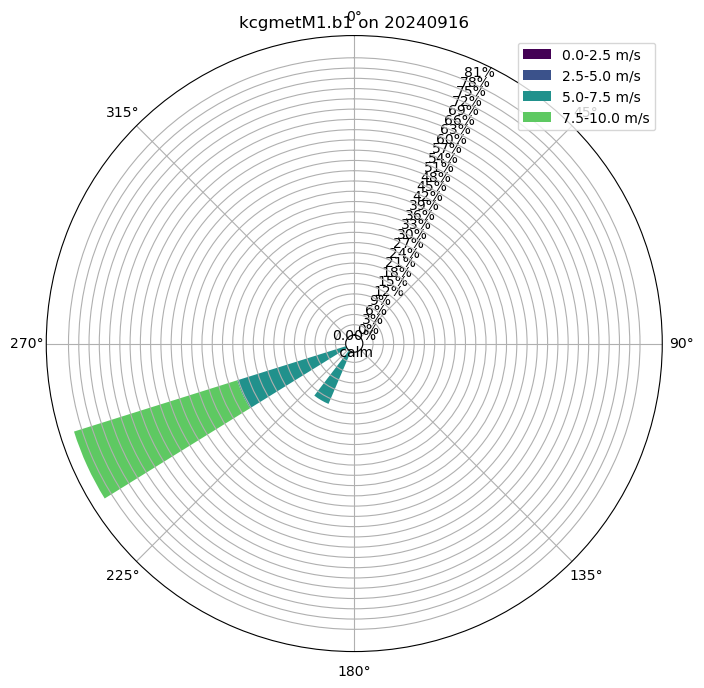

In [62]:
windrose = act.plotting.WindRoseDisplay(ds_met.resample(time='60min').nearest(), figsize=(10,8))
windrose.plot('wdir_vec_mean', 'wspd_vec_mean', spd_bins=np.linspace(0, 10, 5))
windrose.axes[0].legend()
plt.show()

In [63]:

# Set the datastream and start/enddates
datastream = 'kcgmetM1.b1'
startdate1 = '2024-09-16T22:00:00'
enddate1 = '2024-09-17T08:00:00'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate1, enddate1)
ds_met2 = act.io.read_arm_netcdf(result)

[DOWNLOADING] kcgmetM1.b1.20240917.000000.cdf

If you use these data to prepare a publication, please cite:

Kyrouac, J., Shi, Y., & Tuftedal, M. Surface Meteorological Instrumentation
(MET), 2024-09-16 to 2024-09-17, ARM Mobile Facility (KCG), kennaook ⁄ Cape
Grim, Tasmania, Australia; AMF2 (main site for CAPE-k) (M1). Atmospheric
Radiation Measurement (ARM) User Facility. https://doi.org/10.5439/1786358



In [64]:
closed = ds_met2.sel(time=slice(startdate1, enddate1)).resample(time='60min').nearest()

In [67]:
ds_met2.sel(time=slice(startdate1, enddate1))

<xarray.Dataset> Size: 114kB
Dimensions:                       (time: 481, bound: 2)
Coordinates:
  * time                          (time) datetime64[ns] 4kB 2024-09-17 ... 20...
Dimensions without coordinates: bound
Data variables: (12/51)
    base_time                     datetime64[ns] 8B 2024-09-17
    time_offset                   (time) datetime64[ns] 4kB 2024-09-17 ... 20...
    time_bounds                   (time, bound) object 8kB dask.array<chunksize=(481, 2), meta=np.ndarray>
    atmos_pressure                (time) float32 2kB dask.array<chunksize=(481,), meta=np.ndarray>
    qc_atmos_pressure             (time) int32 2kB dask.array<chunksize=(481,), meta=np.ndarray>
    temp_mean                     (time) float32 2kB dask.array<chunksize=(481,), meta=np.ndarray>
    ...                            ...
    qc_logger_volt                (time) int32 2kB dask.array<chunksize=(481,), meta=np.ndarray>
    logger_temp                   (time) float32 2kB dask.array<chunksize=(481,), meta=np.ndarray>
    qc_logger_temp                (time) int32 2kB dask.array<chunksize=(481,), meta=np.ndarray>
    lat                           float32 4B ...
    lon                           float32 4B ...
    alt                           float32 4B ...
Attributes: (12/26)
    command_line:                met_ingest -s kcg -f M1
    Conventions:                 ARM-1.3
    process_version:             ingest-met-4.56-0.el7
    dod_version:                 met-b1-7.6
    input_source:                /data/collection/kcg/kcgmetM1.00/MET_Table1....
    site_id:                     kcg
    ...                          ...
    tbrg_precip_corr_info:       0.000000 * tbrg_precip_total^2 + 1.006000 * ...
    history:                     created by user dsmgr on machine prod-proc4....
    _file_dates:                 ['20240917']
    _file_times:                 ['000000']
    _datastream:                 kcgmetM1.b1
    _arm_standards_flag:         1

In [80]:
hour =0
single_hour = ds_met2.sel(time=f'2024-09-17T0{hour}')

In [69]:
for hour in range(9):
    print(hour)

0
1
2
3
4
5
6
7
8


In [ ]:
WindDisplay = act.plotting.WindRoseDisplay(sonde_ds, figsize=(8, 10), subplot_shape=(2,))
WindDisplay.plot(
    'deg', 'wspd', spd_bins=np.linspace(0, 25, 5), num_dirs=30, tick_interval=2, subplot_index=(0,)
)

In [79]:
act.plotting.WindRoseDisplay?

Init signature:
act.plotting.WindRoseDisplay(
    ds,
    subplot_shape=(1,),
    ds_name=None,
    **kwargs,
)
Docstring:     
A class for handing wind rose plots.

This is inherited from the :func:`act.plotting.Display`
class and has therefore has the same attributes as that class.
See :func:`act.plotting.Display`
for more information. There are no additional attributes or parameters
to this class.

Examples
--------
To create a WindRoseDisplay object, simply do:

.. code-block :: python

    sonde_ds = act.io.arm.read_arm_netcdf('sonde_data.nc')
    WindDisplay = act.plotting.WindRoseDisplay(sonde_ds, figsize=(8,10))
File:           /srv/conda/envs/notebook/lib/python3.10/site-packages/act/plotting/windrosedisplay.py
Type:           type
Subclasses:     

0


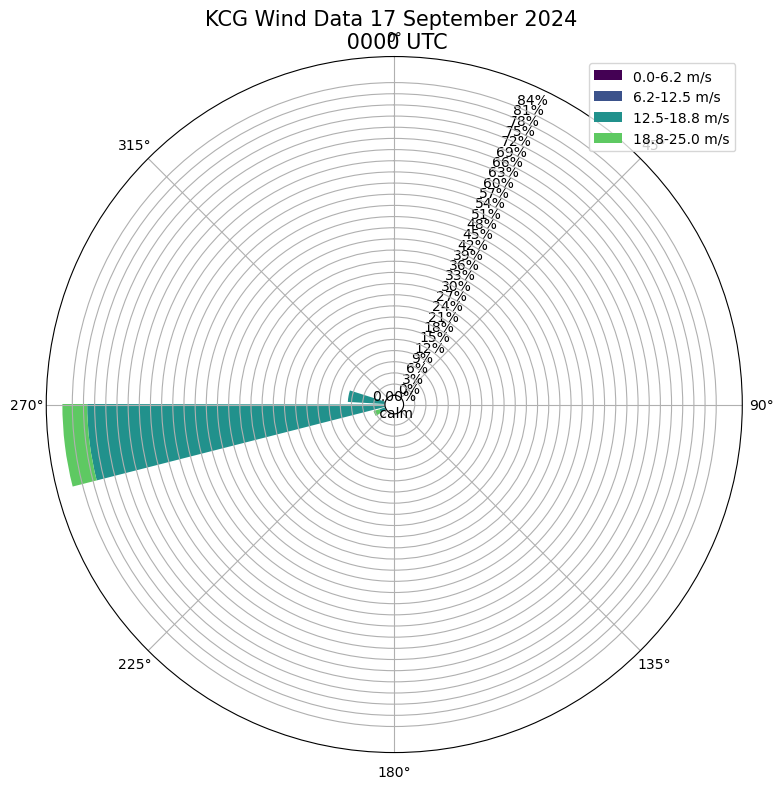

1


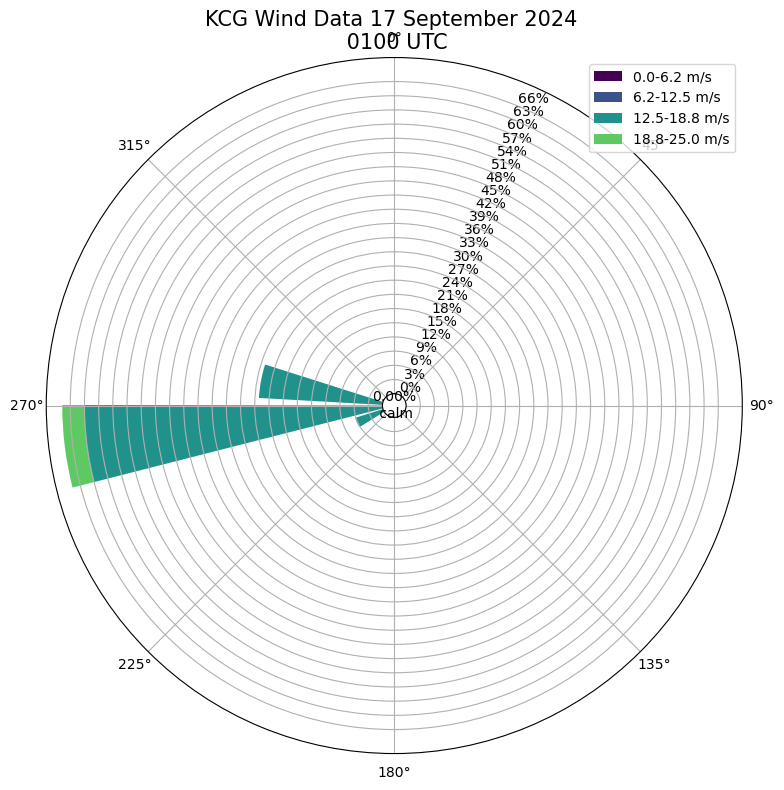

2


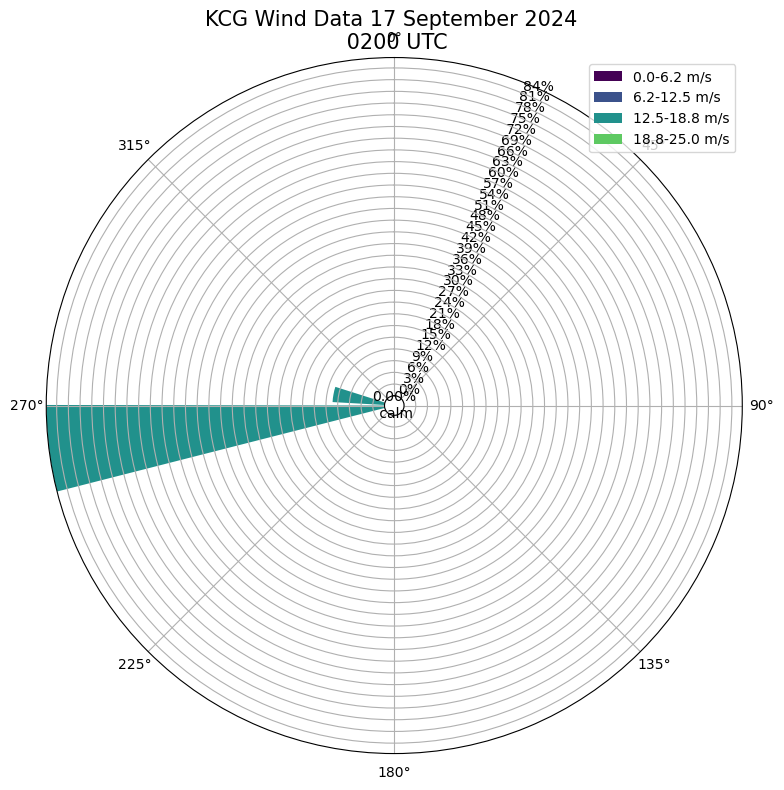

3


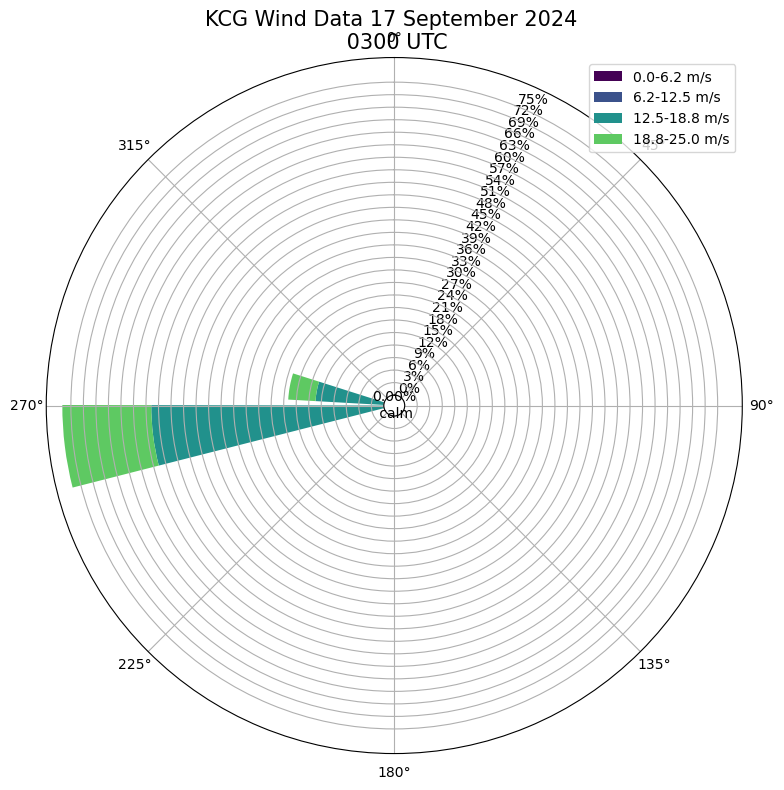

4


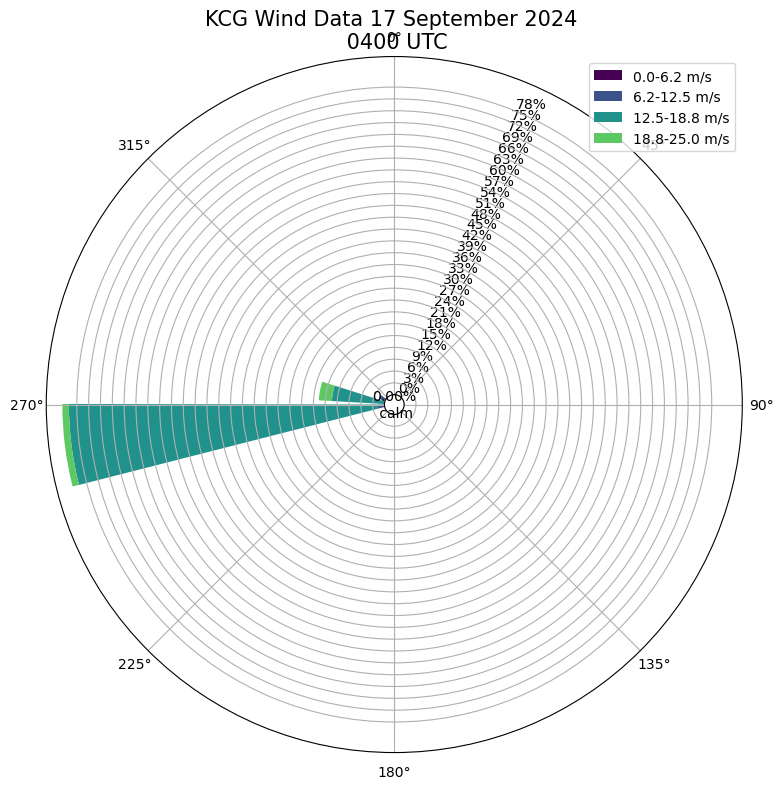

5


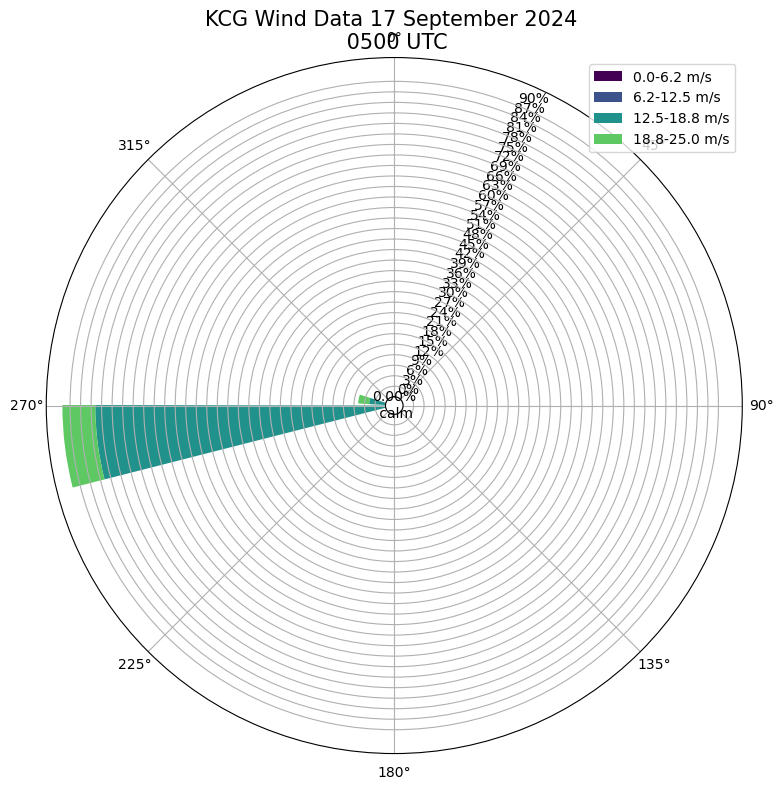

6


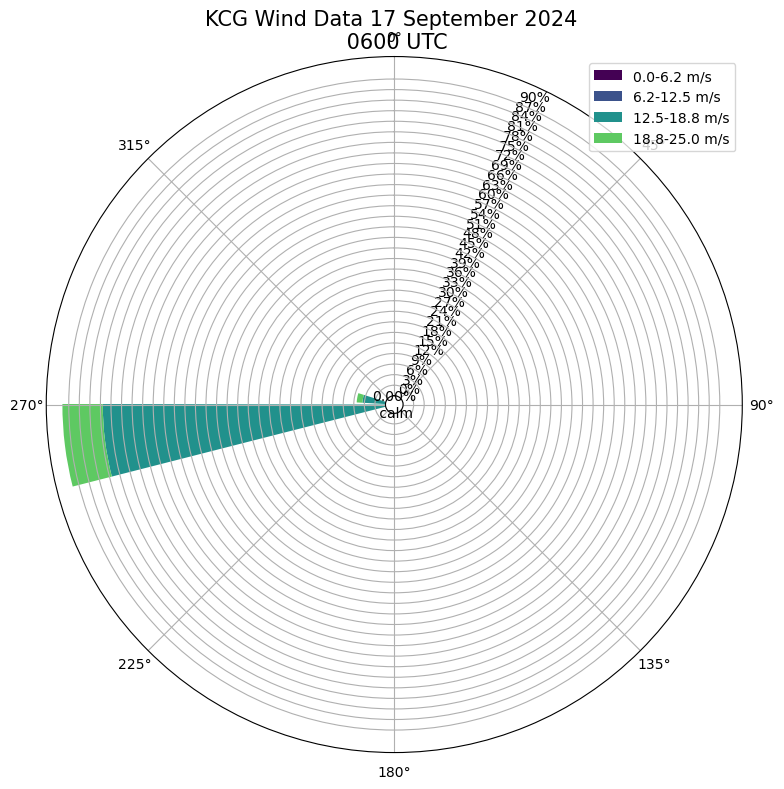

7


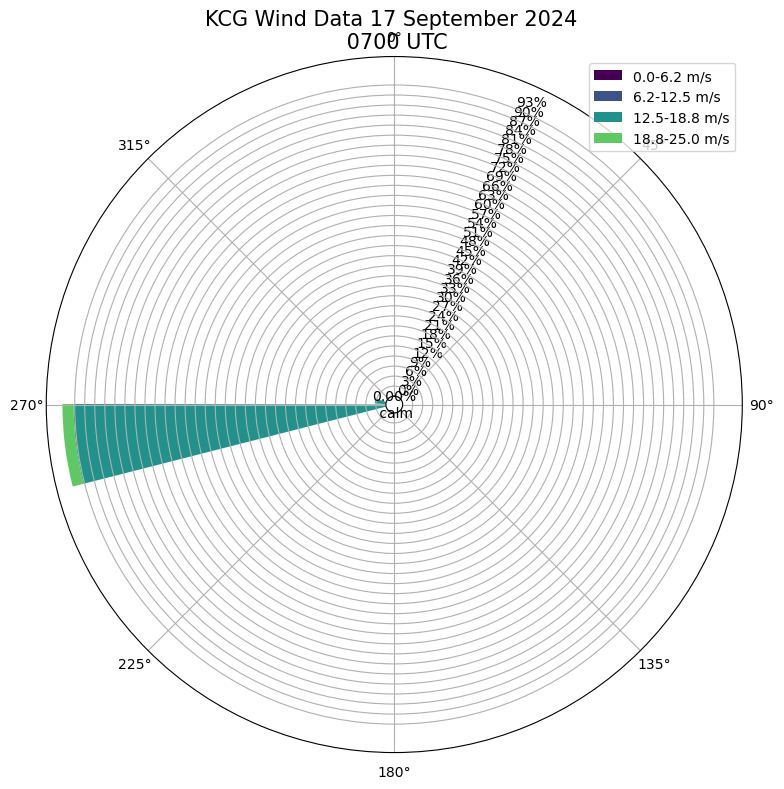

8


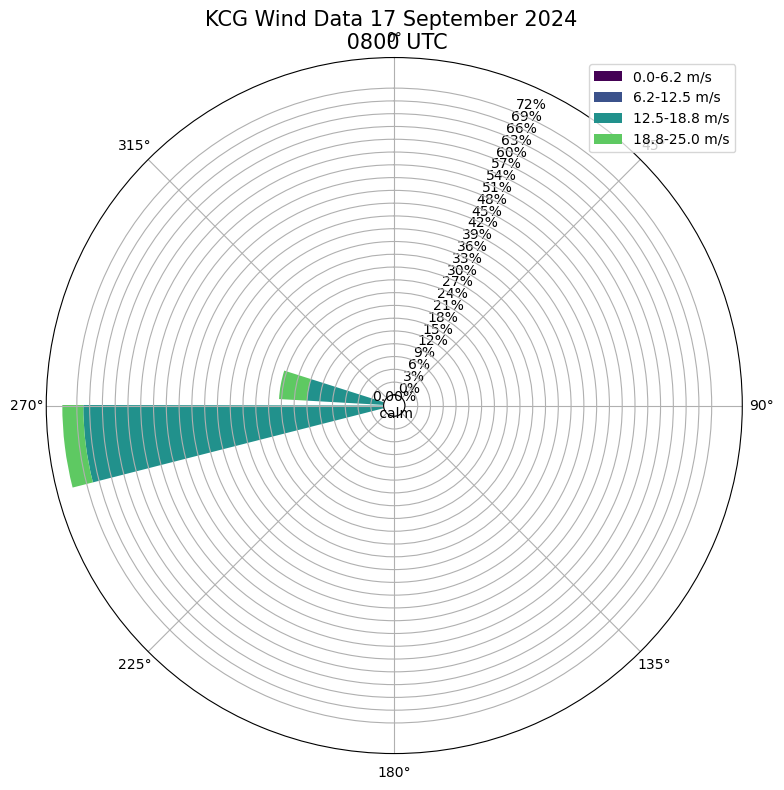

In [89]:
for hour in range(9):
    print(hour)
    single_hour = ds_met2.sel(time=f'2024-09-17T0{hour}')
    windrose = act.plotting.WindRoseDisplay(single_hour, figsize=(10,8))
    windrose.plot('wdir_vec_mean', 'wspd_vec_mean', spd_bins=np.linspace(0, 25, 5))
    plt.title(f"KCG Wind Data 17 September 2024 \n 0{hour}00 UTC", fontsize=15)
    plt.tight_layout()
    plt.show()

In [ ]:
# Set the datastream and start/enddates
datastream = 'kcgmetM1.b1'
startdate1 = '2024-09-19T05:00:00'
enddate1 = '2024-09-19T10:00:00'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result = act.discovery.download_arm_data(username, token, datastream, startdate1, enddate1)
ds_met2 = act.io.read_arm_netcdf(result)